### IMAS MOORING MANUAL QC PLOTTING AND AUTOMATED QC
#### This notebook loads one netcdf file from IMOS threads and then we create a plot of the temperature time series with masked manual qc values on top. 

In [105]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

## Loading data from threads. 

In [106]:
fileName = "https://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/NSW/CH100/Temperature/IMOS_ANMN-NSW_TZ_20210726T215000Z_CH100_FV01_CH100-2107-Aqualogger-AQUAlogger-520T-max1000m-28_END-20211102T220000Z_C-20211117T033150Z.nc"
nc = xr.open_dataset(fileName)
print(nc)  # change this to just `nc` for a more interactive view when running the notebook

<xarray.Dataset>
Dimensions:                (TIME: 29569)
Coordinates:
  * TIME                   (TIME) datetime64[ns] 2021-07-25T13:00:00.00000665...
    LATITUDE               float64 ...
    LONGITUDE              float64 ...
    NOMINAL_DEPTH          float32 ...
Data variables:
    TIMESERIES             int32 ...
    TEMP                   (TIME) float32 ...
    TEMP_quality_control   (TIME) float32 ...
    DEPTH                  (TIME) float32 ...
    DEPTH_quality_control  (TIME) float32 ...
Attributes: (12/54)
    abstract:                      NSW-IMOS Coffs Harbour 100m Mooring
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Austin, Timothy
    author_email:                  t.austin@unsw.edu.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    ...                            ...
    time_deployment_end_origin:    TimeLastInPos
   

### Just trying to understand how this file looks like

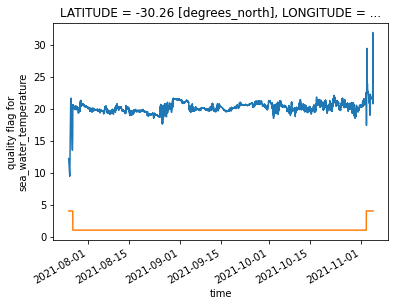

In [107]:
nc.TEMP.plot()
nc.TEMP_quality_control.plot()

#### Naming the two variables we want to work with, the manual qc flags and the temperature dataset

In [119]:
temp=nc.TEMP;
temp_flags=nc.TEMP_quality_control;


In [182]:
temp

<xarray.DataArray 'TEMP' (TIME: 29569)>
array([12.204982, 12.167581, 12.131476, ..., 21.010008, 22.19134 , 26.127272],
      dtype=float32)
Coordinates:
  * TIME           (TIME) datetime64[ns] 2021-07-25T13:00:00.000006656 ... 20...
    LATITUDE       float64 -30.26
    LONGITUDE      float64 153.4
    NOMINAL_DEPTH  float32 28.0
Attributes:
    ancillary_variables:  TEMP_quality_control
    long_name:            temperature
    standard_name:        temperature
    units:                deg C
    valid_max:            40.0
    valid_min:            -2.5
    _ChunkSizes:          29569

In [180]:
temp.attrs["units"] = "deg C"
temp.attrs["long_name"] = "temperature"
temp.LATITUDE.attrs["long_name"] = "temperature"

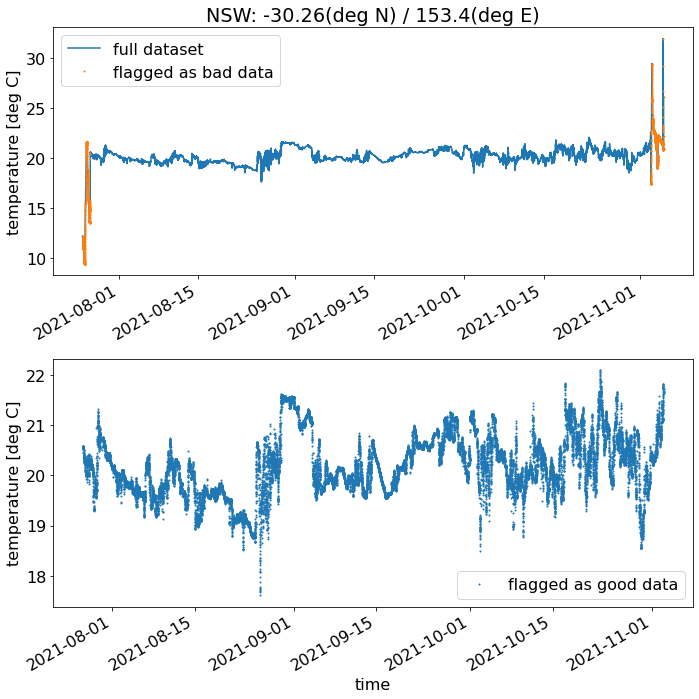

In [215]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams.update({'font.size': 16})
fg,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)#,sharex=True)
        
a, =nc.TEMP.plot(ax=ax1,hue='DEPTH', label='full dataset')
b, =temp[np.where(temp_flags!=1)].plot(ax=ax1,marker='.',linestyle='none',markersize=2,label='flagged as bad data')
ax1.legend(handles=[a, b])
ax1.set_xlabel('')

c, =temp[np.where(temp_flags==1)].plot(ax=ax2,marker='.',linestyle='none',markersize=2,label='flagged as good data')
ax2.legend(handles=[c])

# I haven't authomatized this; so must be changed or commented out
ax1.set_title('NSW: -30.26(deg N) / 153.4 (deg E)')
ax2.set_title('')

plt.tight_layout()